In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import log_loss, f1_score, confusion_matrix
from src.mlp import MLP
from src.layer import Layer
from src.visualisation import plot
from sklearn.preprocessing import OneHotEncoder, StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_training_data(dataset_name):
    df_training = pd.read_csv(f"data/mio1/classification/{dataset_name}-training.csv")
    df_test = pd.read_csv(f"data/mio1/classification/{dataset_name}-test.csv")

    x_train = df_training[['x', 'y']].values.T
    y_train = df_training['c'].values.reshape(-1, 1)

    x_test = df_test[['x', 'y']].values.T
    y_test = df_test['c'].values.reshape(-1, 1)

    enc = OneHotEncoder(sparse_output=False)
    y_train_oh = enc.fit_transform(y_train).T
    y_test_oh = enc.transform(y_test).T

    standard_scaler = StandardScaler()
    x_train_normalised = standard_scaler.fit_transform(x_train.T).T
    x_test_normalised = standard_scaler.transform(x_test.T).T

    return x_train_normalised, y_train_oh, x_test_normalised, y_test, enc

### Easy

In [27]:
x_train, y_train, x_test, y_test, enc = get_training_data("easy")

In [18]:
model = MLP(layers=[
    Layer(2, 2, activation_name="softmax"),
])

In [19]:
loss = model.fit(x_train, y_train, learning_rate=0.001, epochs=2_000, verbose=1, batch_size=25, loss_function="log_loss")

epoch: 500/2000	loss: 0.07995087616745696
epoch: 1000/2000	loss: 0.05287535348494058
epoch: 1500/2000	loss: 0.042990699715492825
epoch: 2000/2000	loss: 0.03745871459908614
done! final loss: 0.03745871459908614


In [28]:
y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

0.9940119760479043

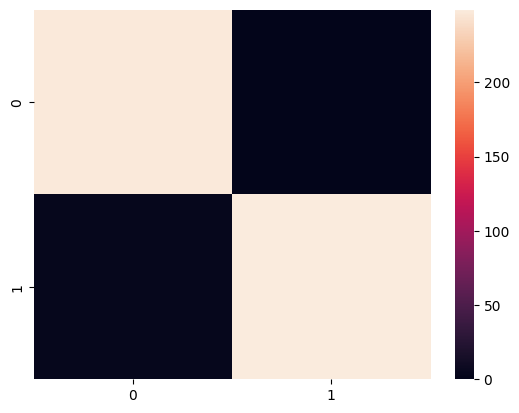

In [29]:
sns.heatmap(confusion_matrix(y_test, y_predicted_class))
f1_score(y_test, y_predicted_class)

### xor3

In [38]:
x_train, y_train, x_test, y_test, enc = get_training_data("xor3")

In [39]:
model = MLP(layers=[
    Layer(2, 20, activation_name="sigmoid"),
    Layer(20, 20, activation_name="sigmoid"),
    Layer(20, 2, activation_name="softmax")
])

In [40]:
loss = model.fit(x_train, y_train, learning_rate=0.001, epochs=4_000, verbose=1, batch_size=50, loss_function="log_loss")

epoch: 500/4000	loss: 0.39384016757319384
epoch: 1000/4000	loss: 0.12451622130665532
epoch: 1500/4000	loss: 0.07768203953312393
epoch: 2000/4000	loss: 0.05788018496539209
epoch: 2500/4000	loss: 0.04545200999064285
epoch: 3000/4000	loss: 0.036450187512691454
epoch: 3500/4000	loss: 0.029371845664591827
epoch: 4000/4000	loss: 0.024095952477551683
done! final loss: 0.024095952477551683


<Axes: >

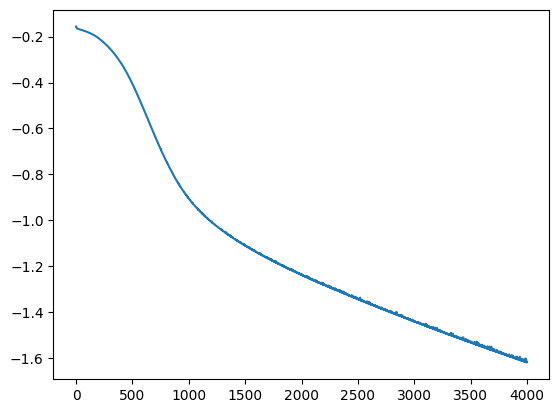

In [41]:
sns.lineplot(np.log10(loss))

In [42]:
y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

F1-score: 0.9348837209302326


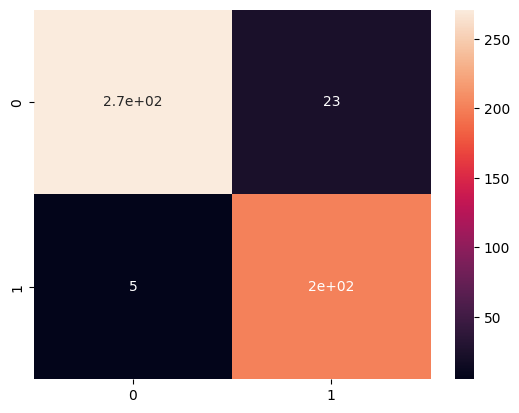

In [43]:
sns.heatmap(confusion_matrix(y_test, y_predicted_class), annot=True)
print(f"F1-score: {f1_score(y_test, y_predicted_class)}")

### Rings3

In [27]:
x_train, y_train, x_test, y_test, enc = get_training_data("rings3-regular")

In [30]:
model = MLP(layers=[
    Layer(2, 2, activation_name="sigmoid"),
    Layer(2, 2, activation_name="sigmoid"),
    Layer(2, 3, activation_name="softmax")
])

In [31]:
loss = model.fit(x_train, y_train, learning_rate=0.005, epochs=5_000, verbose=1, batch_size=50, loss_function_name="log_loss")

epoch: 500/5000	loss: 0.9032619323630385
epoch: 1000/5000	loss: 0.8590081474692377
epoch: 1500/5000	loss: 0.8301143474222329
epoch: 2000/5000	loss: 0.789652328120471
epoch: 2500/5000	loss: 0.779682160101452
epoch: 3000/5000	loss: 0.7742306538478353
epoch: 3500/5000	loss: 0.7692573326407561
epoch: 4000/5000	loss: 0.7664632256081886
epoch: 4500/5000	loss: 0.762720148034927
epoch: 5000/5000	loss: 0.7586343614719817
done! final loss: 0.7586343614719817


<Axes: >

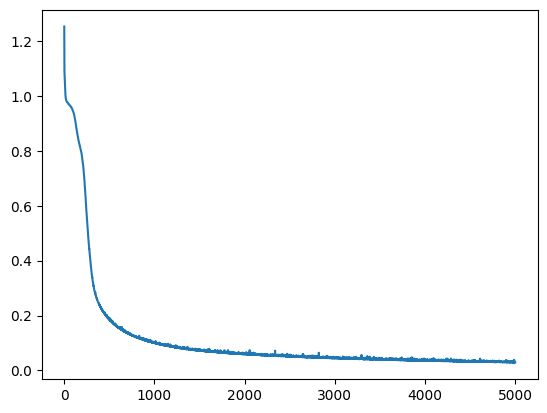

In [23]:
sns.lineplot(loss)

In [24]:
y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

F1-score: 0.9795


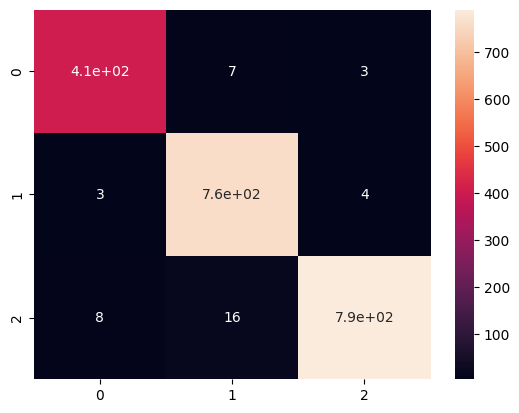

In [25]:
sns.heatmap(confusion_matrix(y_test, y_predicted_class), annot=True)
print(f"F1-score: {f1_score(y_test, y_predicted_class, average='micro')}")

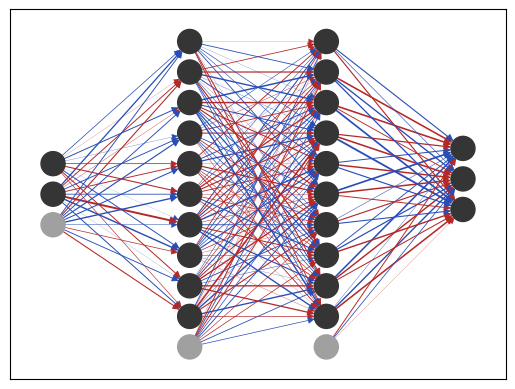

In [26]:
plot(model, log_weights=True)

### Sigmoida na wyjściu

### Easy

In [ ]:
x_train, y_train, x_test, y_test, enc = get_training_data("easy")

model = MLP(layers=[
    Layer(2, 2, activation_name="sigmoid"),
])

model.fit(x_train, y_train, learning_rate=0.001, epochs=2_000, verbose=1, batch_size=25, loss_function="log_loss")

y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

In [35]:
f1_score(y_test, y_predicted_class)

0.9940119760479043

Równie wysoki f1-score, ale to nie jest nic dziwnego, bo zbiór jest liniowo separowalny

### xor3

In [ ]:
x_train, y_train, x_test, y_test, enc = get_training_data("xor3")

model = MLP(layers=[
    Layer(2, 20, activation_name="sigmoid"),
    Layer(20, 20, activation_name="sigmoid"),
    Layer(20, 2, activation_name="sigmoid")
])

model.fit(x_train, y_train, learning_rate=0.001, epochs=4_000, verbose=1, batch_size=50, loss_function="log_loss")

y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

In [45]:
f1_score(y_test, y_predicted_class)

0.9417249417249417

Nawet nieco lepszy wynik, ale pewnie dlatego że też jest "dość" liniowo separowalne (dane tworzą szachownicę), więc być może sigmoid po prostu nieco lepiej sobie tutaj radzi.

### rings3

In [46]:
x_train, y_train, x_test, y_test, enc = get_training_data("rings3-regular")

model = MLP(layers=[
    Layer(2, 4, activation_name="sigmoid"),
    Layer(4, 4, activation_name="sigmoid"),
    Layer(4, 3, activation_name="sigmoid")
])

model.fit(x_train, y_train, learning_rate=0.005, epochs=5_000, verbose=1, batch_size=50, loss_function="log_loss")

y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

epoch: 500/5000	loss: 0.16126762511297987
epoch: 1000/5000	loss: 0.10892398621911069
epoch: 1500/5000	loss: 0.08976382552326538
epoch: 2000/5000	loss: 0.08233488841278469
epoch: 2500/5000	loss: 0.07471032498784078
epoch: 3000/5000	loss: 0.0715478490243339
epoch: 3500/5000	loss: 0.06819264149675909
epoch: 4000/5000	loss: 0.06838007489736923
epoch: 4500/5000	loss: 0.06527377825824404
epoch: 5000/5000	loss: 0.0697570654053441
done! final loss: 0.0697570654053441


In [48]:
f1_score(y_test, y_predicted_class, average="micro")

0.9645

Nadal bardzo zbliżony wynik, chociaż tutaj model przestał uczyć się w mniej więcej połowie epochów a i tak nie osiągnął lepszego wyniku.
Można się domyślać, że przy większej liczbie epochów ta różnica tylko by się powiększyła.

### Liniowa na wyjściu

### Easy

In [ ]:
x_train, y_train, x_test, y_test, enc = get_training_data("easy")

model = MLP(layers=[
    Layer(2, 2, activation_name="linear"),
])

model.fit(x_train, y_train, learning_rate=0.001, epochs=2_000, verbose=1, batch_size=25, loss_function="log_loss")

y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

In [50]:
f1_score(y_test, y_predicted_class)

0.994059405940594

Znówu bardzo dobry wynik, ale jest jednak nieco gorszy od pozostałych

### xor3

In [ ]:
x_train, y_train, x_test, y_test, enc = get_training_data("xor3")

model = MLP(layers=[
    Layer(2, 20, activation_name="sigmoid"),
    Layer(20, 20, activation_name="sigmoid"),
    Layer(20, 2, activation_name="sigmoid")
])

model.fit(x_train, y_train, learning_rate=0.001, epochs=4_000, verbose=1, batch_size=50, loss_function="log_loss")

y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

In [52]:
f1_score(y_test, y_predicted_class)

0.9481132075471699

Zaskakująco nawet lepiej niż na pozostałych

### rings3

In [53]:
x_train, y_train, x_test, y_test, enc = get_training_data("rings3-regular")

model = MLP(layers=[
    Layer(2, 4, activation_name="sigmoid"),
    Layer(4, 4, activation_name="sigmoid"),
    Layer(4, 3, activation_name="sigmoid")
])

model.fit(x_train, y_train, learning_rate=0.005, epochs=5_000, verbose=1, batch_size=50, loss_function="log_loss")

y_predicted = model.predict(x_test)
y_predicted_class = enc.inverse_transform(y_predicted.T)

epoch: 500/5000	loss: 0.5102758696517564
epoch: 1000/5000	loss: 0.42969692455305936
epoch: 1500/5000	loss: 0.32641511734611245
epoch: 2000/5000	loss: 0.25497967580934927
epoch: 2500/5000	loss: 0.22634111307793145
epoch: 3000/5000	loss: 0.21092711589498758
epoch: 3500/5000	loss: 0.20102599586616737
epoch: 4000/5000	loss: 0.19473732936695534
epoch: 4500/5000	loss: 0.18965543915334374
epoch: 5000/5000	loss: 0.1803369414484308
done! final loss: 0.1803369414484308


In [55]:
f1_score(y_test, y_predicted_class, average="micro")

0.9325

Mimo tego, że jest to dość dobry wynik to już znacząco odstaje od pozostałych. Także tutaj model niezbyt uczył się już od połowy.